In [1]:
import pandas as pd 
# birank的top1000的actor和repo
birank_actor_df = pd.read_csv('./birank_actor_top1000.csv', index_col=0)
birank_actor_list = birank_actor_df['new_actor_id'].tolist()
birank_repo_df = pd.read_csv('./birank_repo_top1000.csv', index_col=0)
birank_repo_list = birank_repo_df['new_repo_id'].tolist()

burstbirank_actor_df = pd.read_csv('./burstbirank_actor_top1000.csv', index_col=0)
burstbirank_actor_list = burstbirank_actor_df['new_actor_id'].tolist()
burstbirank_repo_df = pd.read_csv('./burstbirank_repo_top1000.csv', index_col=0)
burstbirank_repo_list = burstbirank_repo_df['new_repo_id'].tolist()

pagerank_actor_df = pd.read_csv('./pagerank_actor_top1000.csv', index_col=0)
pagerank_actor_list = pagerank_actor_df['new_actor_id'].tolist()
pagerank_repo_df = pd.read_csv('./pagerank_repo_top1000.csv', index_col=0)
pagerank_repo_list = pagerank_repo_df['new_repo_id'].tolist()



In [2]:
# 以下为构建的actor 的Precision recall F1
# 10 20 50 100 200 500 1000
lin = [10,50,100,200,500,1000]
def calculate(target,bi,burst,page):
    precision_list = []
    recall_list = []
    f1_list = []
    for i in lin:
        bi_page = list(set(bi[0:i]) & set(page[0:i]))
        bi_burst = list(set(bi[0:i]) & set(burst[0:i]))
        page_burst = list(set(page[0:i]) & set(burst[0:i]))
        A2 = list(set(bi_page) | set(bi_burst)| set(page_burst))
        precision= 1.0*len(list(set(target[0:i]) & set(A2))) / len(list(set(target[0:i])))
        recall = 1.0*len(list(set(target[0:i]) & set(A2))) / len(A2)
        f1 = 1.0*(2*precision*recall)/(precision+recall)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
    return precision_list,recall_list,f1_list





In [3]:
actor_pre_birank, actor_rec_birank, actor_f1_birank= calculate(birank_actor_list,birank_actor_list,burstbirank_actor_list,pagerank_actor_list)
# print(actor_pre_birank)
# print(actor_rec_birank)
# print(actor_f1_birank)
actor_pre_burstbirank, actor_rec_burstbirank, actor_f1_burstbirank= calculate(burstbirank_actor_list,birank_actor_list,burstbirank_actor_list,pagerank_actor_list)
actor_pre_pagerank, actor_rec_pagerank, actor_f1_pagerank= calculate(pagerank_actor_list,birank_actor_list,burstbirank_actor_list,pagerank_actor_list)

repo_pre_birank, repo_rec_birank, repo_f1_birank= calculate(birank_repo_list,birank_repo_list,burstbirank_repo_list,pagerank_repo_list)
repo_pre_burstbirank, repo_rec_burstbirank, repo_f1_burstbirank= calculate(burstbirank_repo_list,birank_repo_list,burstbirank_repo_list,pagerank_repo_list)
repo_pre_pagerank, repo_rec_pagerank, repo_f1_pagerank= calculate(pagerank_repo_list,birank_repo_list,burstbirank_repo_list,pagerank_repo_list)


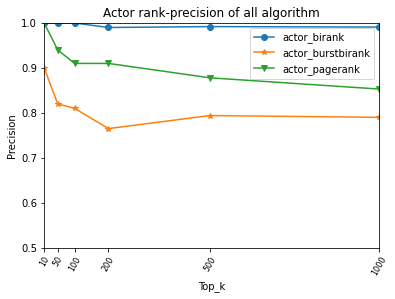

In [4]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, actor_pre_birank, marker='o',label='actor_birank')
plt.plot(x, actor_pre_burstbirank, marker='*',label='actor_burstbirank')
plt.plot(x, actor_pre_pagerank, marker='v', label='actor_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("Precision") #Y轴标签
pyplot.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Actor rank-precision of all algorithm") #标题
plt.savefig('./Actor rank-precision.jpg')


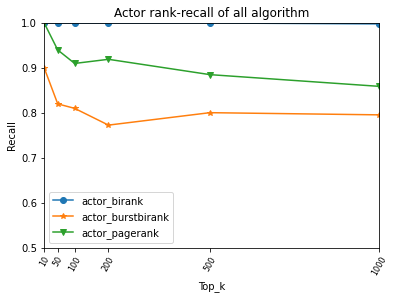

In [5]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, actor_rec_birank, marker='o',label='actor_birank')
plt.plot(x, actor_rec_burstbirank, marker='*',label='actor_burstbirank')
plt.plot(x, actor_rec_pagerank, marker='v', label='actor_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("Recall") #Y轴标签
pyplot.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Actor rank-recall of all algorithm") #标题
plt.savefig('./Actor rank-recall.jpg')

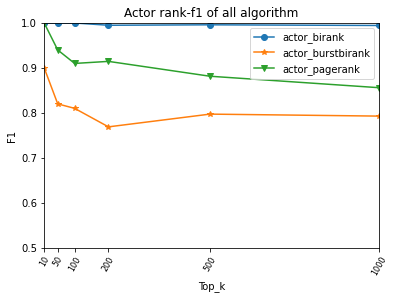

In [6]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, actor_f1_birank, marker='o',label='actor_birank')
plt.plot(x, actor_f1_burstbirank, marker='*',label='actor_burstbirank')
plt.plot(x, actor_f1_pagerank, marker='v', label='actor_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("F1") #Y轴标签
pyplot.yticks([0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Actor rank-f1 of all algorithm") #标题
plt.savefig('./Actor rank-f1.jpg')

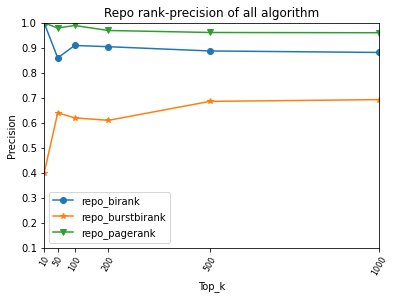

In [10]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, repo_pre_birank, marker='o',label='repo_birank')
plt.plot(x, repo_pre_burstbirank, marker='*',label='repo_burstbirank')
plt.plot(x, repo_pre_pagerank, marker='v', label='repo_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("Precision") #Y轴标签
pyplot.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Repo rank-precision of all algorithm") #标题
plt.savefig('./Repo rank-precision.jpg')

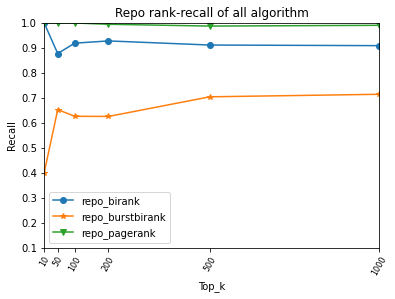

In [11]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, repo_rec_birank, marker='o',label='repo_birank')
plt.plot(x, repo_rec_burstbirank, marker='*',label='repo_burstbirank')
plt.plot(x, repo_rec_pagerank, marker='v', label='repo_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("Recall") #Y轴标签
pyplot.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Repo rank-recall of all algorithm") #标题
plt.savefig('./Repo rank-recall.jpg')

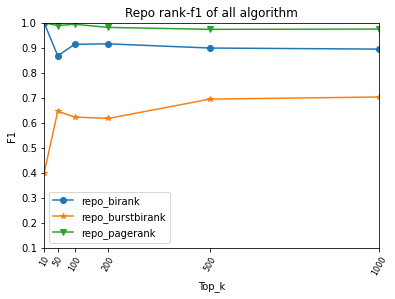

In [12]:
# 作图
from matplotlib import pyplot
import matplotlib.pyplot as plt

x = lin
 
plt.plot(x, repo_f1_birank, marker='o',label='repo_birank')
plt.plot(x, repo_f1_burstbirank, marker='*',label='repo_burstbirank')
plt.plot(x, repo_f1_pagerank, marker='v', label='repo_pagerank')
plt.legend()  # 让图例生效
plt.xticks(x,[10,50,100,200,500,1000] , rotation=60,fontsize=8)
 
plt.margins(0)
plt.subplots_adjust(bottom=0.10)
plt.xlabel('Top_k') #X轴标签
plt.ylabel("F1") #Y轴标签
pyplot.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title("Repo rank-f1 of all algorithm") #标题
plt.savefig('./Repo rank-f1.jpg')